In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
PATH = "./assets/diva_2004"

In [4]:
!ls {PATH}

Dataset-explanation.xlsx	DiVA-WoS-keywordsplus-2004-18.txt
DiVA-KTH-authors-2004-18.txt	DiVA-all-authors-2004-18.txt
DiVA-WoS-abstracts-2004-18.txt	DiVA-records-2004-2018.txt
DiVA-WoS-keywords-2004-18.txt


Där finns en Excel-fil som förklara vissa datafält/kolumner i två tabeller (DiVA-record och DiVA-all-authors).
Det finns sex olika filer som är tab-separerade.
1.       Diva-records: innehåller info för varje post i diva och som är publicerat på engelska mellan 2014-2018. Viktiga variabler: PID, doc_id.
2.       Diva-wos-keywords: innehåller nyckelord som författare anger i sina WoS-publikationer (sub-dataset i DiVA) Viktiga variabler: doc_id.
3.       Diva-wos-keywordplus: innehåller nyckelord som databasen WoS automatiskt tilldelar till publikationer. (sub-dataset i DiVA) Viktiga variabler: doc_id.
4.       Diva-wos-abstract: innehåller abstract till samtliga publikationer i WoS. Samma data ska finnas i tabellen ’Diva-records’. Viktiga variabler: doc_id.
5.       Diva-all-authors: innehåller namn, id och info för samtliga medförfattare. Viktiga variabler: PID, doc-id, diva-author-id.
6.       Diva-KTH-authors: innehåller samma info men för enbart KTH forskare. Det är bara våra forskare som har info angående institutionstillhörighet.

# 1.Diva-records: innehåller info för varje post i diva och som är publicerat på engelska mellan 2014-2018. Viktiga variabler: PID, doc_id.

In [5]:
!head -n1 '{PATH}/DiVA-records-2004-2018.txt'

In [6]:
col_names_diva_records = ["PID","DOI","ISI","Doc_id","PMID","ScopusId","Title","Doc_Year","PublicationType","ContentType",
             "pt_new","pt_ordning","Doc_Language","Journal","JournalISSN","Publisher","Series","SeriesISSN","ISBN",
                "Keywords", "Categories", "ResearchSubjects", "Projects","Abstract","PublicationSubtype",
                "Conference","biblio_uppg"]




In [7]:
diva_records = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-records-2004-2018.txt",names=col_names_diva_records,delimiter="\t", skiprows=1)




/home/ekvall/anaconda3/envs/kth-cluster/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
diva_records.head(3)

,PID,DOI,ISI,Doc_id,PMID,ScopusId,Title,Doc_Year,PublicationType,ContentType,...,SeriesISSN,ISBN,Keywords,Categories,ResearchSubjects,Projects,Abstract,PublicationSubtype,Conference,biblio_uppg
0,10043,10.1177/0021998304040559,000220671000003,33254889,NaN,2-s2.0-1842526619,Compressive failure of impacted NCF composite ...,2004,Artikel i tidskrift,Refereegranskat,...,NaN,NaN,CAI;CFRP;Damage tolerance;Fractography;Sandwich,Tillförlitlighets- och kvalitetsteknik (20305),NaN,NaN,"<p>In the present study, non-crimp fabric (NCF...",NaN,NaN,"Edgren, Fredrik, Asp, Lars E., Bull, Peter H..."
1,10065,10.1016/j.apcatb.2004.09.001,000224948100007,34027645,NaN,2-s2.0-6044269328,Thermal gas treatment to regenerate spent auto...,2004,Artikel i tidskrift,Refereegranskat,...,NaN,NaN,Automotive catalyst; Dispersion; Oxy-chlorine;...,Kemi (104),NaN,NaN,<p>The effect of regeneration on the metal dis...,NaN,NaN,"Birgersson, Henrik, Eriksson, L, Boutonnet, ..."
2,10082,10.1016/j.ab.2004.07.003,000224710600007,34001109,NaN,2-s2.0-4644337415,Fluorescence resonance energy transfer-based d...,2004,Artikel i tidskrift,Refereegranskat,...,NaN,NaN,antibody variable domains;bacterial receptor d...,Biokemi och molekylärbiologi (10602),NaN,NaN,<p>A new method for specific detection of prot...,NaN,NaN,"Renberg, Björn, Nygren, Per-Åke, Eklund, Mal..."


# 2.Diva-wos-keywords: innehåller nyckelord som författare anger i sina WoS-publikationer (sub-dataset i DiVA) Viktiga variabler: doc_id.

In [9]:
!head -n1 '{PATH}/DiVA-WoS-keywords-2004-18.txt'

In [10]:
col_names_keywords = ["Doc_id","Auth_keyw_id","Keyword"]

In [11]:
keywords = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-WoS-keywords-2004-18.txt",names=col_names_keywords, delimiter="\t",skiprows=1)




In [12]:
keywords.head(2)

,Doc_id,Auth_keyw_id,Keyword
0,3551059,4172937,long wavelength
1,3551059,4172938,vertical cavity laser


# 3.       Diva-wos-keywordplus: innehåller nyckelord som databasen WoS automatiskt tilldelar till publikationer. (sub-dataset i DiVA) Viktiga variabler: doc_id.

In [13]:
!head -n1 '{PATH}/DiVA-WoS-keywordsplus-2004-18.txt'

In [14]:
col_names_keywords_plus = ["Doc_id","KWP_id","Keyword"]

In [15]:
keywords_plus = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-WoS-keywordsplus-2004-18.txt", names=col_names_keywords_plus, delimiter="\t",skiprows=1)#;keywords.drop(index=0,inplace=True)

In [16]:
keywords_plus.tail()

,Doc_id,KWP_id,Keyword
197138,89995430,330097096,BONE
197139,89995430,330097097,SURFACE
197140,89995430,330097098,DIFFERENTIATION
197141,89995430,330097099,PROLIFERATION
197142,89995430,330097100,ATTACHMENT


# 4.       Diva-wos-abstract: innehåller abstract till samtliga publikationer i WoS. Samma data ska finnas i tabellen ’Diva-records’. Viktiga variabler: doc_id.

In [17]:
!head -n1 '{PATH}/DiVA-WoS-abstracts-2004-18.txt'

In [18]:
col_abstract = ["Doc_id","Abstract_id","Text"]

In [19]:
abstract = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-WoS-abstracts-2004-18.txt",names=col_abstract, delimiter="\t",skiprows=1)



In [20]:
abstract.head(3)

,Doc_id,Abstract_id,Text
0,3551059,2457985,We describe the development of long-wavelength...
1,3567406,2472302,Thick section copper canisters are planned to ...
2,3567406,2472303,Specimens cut from the friction stir welds and...


# 5.       Diva-all-authors: innehåller namn, id och info för samtliga medförfattare. Viktiga variabler: PID, doc-id, diva-author-id.

In [37]:
!head -n1 '{PATH}/DiVA-all-authors-2004-18.txt'

In [22]:
col_all_author = ["PID","Diva_author_id","Name","KTH_id","ORCID_iD","Diva_school_id","skola_namn","Diva_dep_id",
             "dep_name","Diva_sub_dep_id","sub_dep_name","Doc_id"]

In [23]:
all_author = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-all-authors-2004-18.txt",names=col_all_author, delimiter="\t",skiprows=1)



# 6.       Diva-KTH-authors: innehåller samma info men för enbart KTH forskare. Det är bara våra forskare som har info angående institutionstillhörighet.

In [24]:
!head -n1 '{PATH}/DiVA-KTH-authors-2004-18.txt'

In [25]:
col_KTH_author = ["PID","Doc_id","Diva_author_id","KTH_id","Name","Diva_school_id","skola_namn","Diva_dep_id",
             "dep_name","Diva_sub_dep_id","sub_dep_name","ORCID_iD"]

In [26]:
KTH_author = pd.read_csv(filepath_or_buffer=f"{PATH}/DiVA-KTH-authors-2004-18.txt",names=col_KTH_author, delimiter="\t",skiprows=1)

In [27]:
KTH_author.head(3)

,PID,Doc_id,Diva_author_id,KTH_id,Name,Diva_school_id,skola_namn,Diva_dep_id,dep_name,Diva_sub_dep_id,sub_dep_name,ORCID_iD
0,1001739,70857041,1517467,u1i16que,"Bodén, Hans",6091,Skolan för teknikvetenskap (SCI),6092.0,Farkost och flyg,6102.0,MWL Marcus Wallenberg Laboratoriet,0000-0002-8474-8563
1,1002469,70859145,1517486,u15y67rb,"Lee, Sunjae",879224,"Skolan för kemi, bioteknologi och hälsa (CBH)",879309.0,Proteinvetenskap,0.0,NaN,0000-0002-6428-5936
2,1002469,70859145,1517487,u1t8kmr6,"Mardinoglu, Adil",879224,"Skolan för kemi, bioteknologi och hälsa (CBH)",879309.0,Proteinvetenskap,0.0,NaN,NaN


# Data discovery

In [28]:
data_files = [diva_records,keywords,keywords_plus,abstract,all_author,KTH_author]
data_file_names = ["diva_records","keywords","keywords_plus","abstract","all_author","KTH_author"]

In [29]:
for df, name in zip(data_files,data_file_names):
    print("\n \n #######   ",name,"  #######")
    print(df.info())


 
 #######    diva_records   #######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39311 entries, 0 to 39310
Data columns (total 27 columns):
PID                   39311 non-null int64
DOI                   34986 non-null object
ISI                   34625 non-null object
Doc_id                39311 non-null object
PMID                  2752 non-null object
ScopusId              32147 non-null object
Title                 39311 non-null object
Doc_Year              39311 non-null int64
PublicationType       39311 non-null object
ContentType           39311 non-null object
pt_new                39311 non-null object
pt_ordning            39311 non-null int64
Doc_Language          39311 non-null object
Journal               39242 non-null object
JournalISSN           38849 non-null object
Publisher             12996 non-null object
Series                0 non-null float64
SeriesISSN            0 non-null float64
ISBN                  84 non-null object
Keywords              29250 no

In [30]:
def end_correctly(text):
    if text[-1] =="." or text[-1] == " ":
        return text
    else:
        new_text = end_correctly(text[:-1])
    return new_text
        

In [43]:
df_s = all_author.skola_namn

In [49]:
all_author

,PID,Diva_author_id,Name,KTH_id,ORCID_iD,Diva_school_id,skola_namn,Diva_dep_id,dep_name,Diva_sub_dep_id,sub_dep_name,Doc_id
0,10011,1517444,"Baykov, Vitaly",u1rzfuyw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
1,10011,1517445,"Jerlerud Perez, Rosa",u1x19ywo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
2,10011,1517446,"Korzhavyi, Pavel A.",u17nfa0i,0000-0002-9920-5393,NaN,NaN,NaN,NaN,NaN,NaN,.
3,10011,1517447,"Sundman, Bo",u1q5l5sh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
4,10011,1517448,"Johansson, Börje",u13m8u34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
...,...,...,...,...,...,...,...,...,...,...,...,...
218106,9973,1911265,"Sjöberg, John",u1azr94g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
218107,9979,1911273,"Velichkova, Polina",u18y5aj1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
218108,9979,1911274,"Himo, Fahmi",u1hl0yc6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
218109,9980,1911275,"Velichkova, Polina",u18y5aj1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.


There's alot of ROWS with no Doc_id i.e., ".". Remove those

In [38]:
diva_records.shape

(39311, 27)

In [39]:
diva_records[diva_records.Doc_id.values =="."].shape

(5178, 27)

In [41]:
KTH_author.PID.shape

(54730,)

In [42]:
KTH_author.PID.unique().shape

(25549,)

Give documents that miss document id an unique id.

In [46]:
for i, p in enumerate(KTH_author[KTH_author.Doc_id.values == "."].PID.unique()):
    KTH_author.loc[KTH_author.PID.values == p, "Doc_id"] = i
    diva_records.loc[diva_records.PID.values ==p, "Doc_id"] = i
    

# Drop . remaining in diva_records since we don't have these pids in the KTH df. 

In [48]:
diva_records = diva_records[diva_records.Doc_id.values != "."].reset_index(drop=True)

# Drop nan-abstratcs

In [53]:
diva_records = diva_records[pd.notnull(diva_records['Abstract'])].reset_index(drop=True)

In [55]:
categories = list()
for cat in diva_records.Categories.values:
    if isinstance(cat,float):
        categories.append("NaN")
    else:
        categories.append(cat.split("(")[0][:-1])

In [56]:
abst_list = list()
cat = list()
words = list()
doc_id = diva_records.Doc_id.unique()
doc_id_list = list()
for d_id in doc_id:
    row = diva_records[diva_records.Doc_id == d_id]
    abst = row.Abstract.values[0]
    abst_list.append(end_correctly(abst[3:-3]))
    doc_id_list.append(d_id)
       

In [57]:
df = pd.DataFrame({"Abstracts":abst_list, "Doc_id": doc_id_list})


# Create new ID's for KTH author that miss ID.

In [58]:
nan_authors_df = KTH_author[KTH_author.KTH_id.isna()]

In [59]:
nan_id_dict = dict()
for diva_id in nan_authors_df.Diva_author_id.unique():
    if nan_authors_df[nan_authors_df.Diva_author_id == diva_id].Name.values.shape[0] ==  1:
        name = nan_authors_df[nan_authors_df.Diva_author_id == diva_id].Name.values[0]
        nan_id_dict[str(diva_id)] = "ux" + str(diva_id)

In [60]:
for diva_id in nan_authors_df.Diva_author_id.unique():
    KTH_author.loc[KTH_author.Diva_author_id == diva_id, "KTH_id"] = nan_id_dict[str(diva_id)]

    

In [63]:
not_contain_u_user = KTH_author[np.invert(KTH_author.KTH_id.str.contains("u"))]

In [64]:
non_u_dict = dict()
for diva_id in not_contain_u_user.Diva_author_id.unique():
    name = not_contain_u_user[not_contain_u_user.Diva_author_id == diva_id].Name.values[0]
    non_u_dict[str(diva_id)] = "ux" + str(diva_id)
    

In [65]:
for diva_id in not_contain_u_user.Diva_author_id.unique():
    KTH_author.loc[KTH_author.Diva_author_id == diva_id, "KTH_id"] = non_u_dict[str(diva_id)]

In [66]:
kth_pids = KTH_author.Doc_id

In [69]:
#unique_kth_id = KTH_author.KTH_id.unique()
unique_kth_id = KTH_author.KTH_id.unique()

Find authors that are have non-Ascii letters in their name.

In [70]:
id_auth = dict()
non_asci = list()
for u_id in unique_kth_id:
    exist_ascII = False
    authors = KTH_author[KTH_author.KTH_id == u_id].Name.unique()
    if len(authors) > 1:
        
        for a in authors:
            if all(ord(c) < 128 for c in a):
                id_auth[u_id] = a
                exist_ascII = True
        if not exist_ascII:
            print("WARNING author non ASCII", authors)
            non_asci.append(u_id)
        
    else:
        if all(ord(c) < 128 for c in authors[0]):
            id_auth[u_id] = authors[0]
            exist_ascII = True
            id_auth[u_id] = authors[0]
        if not exist_ascII:
            print("WARNING author non ASCII", authors)
            non_asci.append(u_id)
    exist_ascII = False

WARNING author non ASCII ['Mårtensson, Gustaf']
WARNING author non ASCII ['Efsing, Pål']
WARNING author non ASCII ['Ström, Valter']
WARNING author non ASCII ['Behm, Mårten']
WARNING author non ASCII ['Ström, Petter']
WARNING author non ASCII ['Erlandsson, Björn-Erik']
WARNING author non ASCII ['Marklund, Göran T.' 'Marklund, Göran' 'Marklund, Göran T']
WARNING author non ASCII ['Håkansson, Cecilia']
WARNING author non ASCII ['Bayraktar, Ömer']
WARNING author non ASCII ['Jacksén, Johan']
WARNING author non ASCII ['Emmer, Åsa']
WARNING author non ASCII ['Söder, Lennart' 'Söder, Lennart H.']
WARNING author non ASCII ['Dinér, Peter']
WARNING author non ASCII ['Olsson, Mårten']
WARNING author non ASCII ['Wahlström, Jens']
WARNING author non ASCII ['Löfdahl, Björn']
WARNING author non ASCII ['Fridström, Richard']
WARNING author non ASCII ['Bälter, Olle' 'Bälter, Olof']
WARNING author non ASCII ['Stjernström, Mårten']
WARNING author non ASCII ['Söderberg, Daniel' 'Söderberg, L. Daniel']
WARNI

WARNING author non ASCII ['Lindén, Henrik']
WARNING author non ASCII ['Söderlind, Johan']
WARNING author non ASCII ['Rådeström, Sarah']
WARNING author non ASCII ['Engström, Susanne']
WARNING author non ASCII ['Karlson, Mårten']
WARNING author non ASCII ['Råsander, Mikael']
WARNING author non ASCII ['Näfver, Jonas Jarlmark']
WARNING author non ASCII ['Bäck, Torbjörn']
WARNING author non ASCII ['Sköld, Per']
WARNING author non ASCII ['Örnek, Cem']
WARNING author non ASCII ['Håkansson, Karl M. O.' 'Håkansson, Karl']
WARNING author non ASCII ['Rosén, Christer']
WARNING author non ASCII ['Åkesson, L.']
WARNING author non ASCII ['Björk, L.']
WARNING author non ASCII ['Engström, Joakim']
WARNING author non ASCII ['ZappalÁ\xa0, Stefano']
WARNING author non ASCII ['Nilebäck, Linnea']
WARNING author non ASCII ['Andrén, Oliver C. J.' 'Andrén, Oliver' 'Andrén, Olver C. J.']
WARNING author non ASCII ['Öktem, Ozan' 'Ozan, Öktem']
WARNING author non ASCII ['Persson, Björn']
WARNING author non ASCII [

WARNING author non ASCII ['Helgason, Pétur']
WARNING author non ASCII ['Törnblom, Oskar']
WARNING author non ASCII ['Västberg, Oskar Blom']
WARNING author non ASCII ['Fransén, Erik']
WARNING author non ASCII ['Häggström, Daniel']
WARNING author non ASCII ['Björklund, Stefan']
WARNING author non ASCII ['Vrána, TomáÅ¡']
WARNING author non ASCII ['Sjöstedt, Evelina']
WARNING author non ASCII ['Åkerman, Jonas']
WARNING author non ASCII ['Håkansson, Anne']
WARNING author non ASCII ['Björkqvist, Oskar']
WARNING author non ASCII ['GarcÁ\xada GarcÁ\xada, Sandra']
WARNING author non ASCII ['Käll, Lukas']
WARNING author non ASCII ['Linderbäck, Klas']
WARNING author non ASCII ['Andreasson, Jörgen']
WARNING author non ASCII ['Källner, Emelie']
WARNING author non ASCII ['Slätt, Johnny']
WARNING author non ASCII ['Backlund, Hanéle']
WARNING author non ASCII ['Mikael E., Lindström']
WARNING author non ASCII ['Barragán-Beaud, Camila']
WARNING author non ASCII ['Salmén, F.']
WARNING author non ASCII ['

WARNING author non ASCII ['Dånmark, Staffan']
WARNING author non ASCII ['Elenius, Måns']
WARNING author non ASCII ['Hofström, Camilla']
WARNING author non ASCII ['Rydén, Tobias']
WARNING author non ASCII ['Käck, Emilia']
WARNING author non ASCII ['Häcker, Christine']
WARNING author non ASCII ['Trané, Camilla']
WARNING author non ASCII ['Tjörnhammar, Richard' 'Tjörnhammar, Richard O.']
WARNING author non ASCII ['Höök, L. Josef' 'Höök, Josef' 'Höök, Lars Josef']
WARNING author non ASCII ['Järver, Peter']
WARNING author non ASCII ['Renberg, Björn']
WARNING author non ASCII ['Ericson, Mårten']
WARNING author non ASCII ['Bång, Karl-Lennart' 'Bång, Karl Lennart']
WARNING author non ASCII ['Trönnberg, Linda']
WARNING author non ASCII ['Söderström, Ove']
WARNING author non ASCII ['Rehbinder, Göran']
WARNING author non ASCII ['Björkman, Mårten']
WARNING author non ASCII ['Carlström, Johan']
WARNING author non ASCII ['Granlund, Torbjörn']
WARNING author non ASCII ['Nygårds, Mikael']
WARNING auth

WARNING author non ASCII ['Gabry, Frédéric']
WARNING author non ASCII ['Österberg, Elin']
WARNING author non ASCII ['Königsson, Fredrik']
WARNING author non ASCII ['Rüdiger, Arne']
WARNING author non ASCII ['Kahles, André']
WARNING author non ASCII ['Renström, Jonas']
WARNING author non ASCII ['Gudmundsson, Thorbjörn']
WARNING author non ASCII ['Svärd, Henrik']
WARNING author non ASCII ['Morales-España, Germán']
WARNING author non ASCII ['González-Hässig, Andrés']
WARNING author non ASCII ['Krüger, Niclas A.']
WARNING author non ASCII ['Norström, Emelie']
WARNING author non ASCII ['Dymén, Christian']
WARNING author non ASCII ['Nyblom, Åsa']
WARNING author non ASCII ['Norén, Johan']
WARNING author non ASCII ['Izaki, Åsmund']
WARNING author non ASCII ['Nyström, Johan']
WARNING author non ASCII ['Börjesson Rivera, Miriam']
WARNING author non ASCII ['Hägg, Per']
WARNING author non ASCII ['Wikström, Martina']
WARNING author non ASCII ['Mårtensson, Per']
WARNING author non ASCII ['VélÁ«z, He

Make a dictonary containing all non-ascii names.

In [72]:
translate_dict = dict();
translate_dict["ö"] = "o"
translate_dict["ä"] = "a"
translate_dict["å"] = "a"
translate_dict["Ö"] = "O"
translate_dict["Ä"] = "A"
translate_dict["Å"] = "A"
translate_dict["é"] = "e"
translate_dict["ü"] = "u"
translate_dict["á"] = "a"
translate_dict["Á"] = "A"
translate_dict["\xad"] = ""
translate_dict["æ"] = "a"
translate_dict["¡"] = "i"
translate_dict["«"] = "a"
translate_dict["ó"] = "O"
translate_dict["œ"] = "o"
translate_dict["\xa0"] = ""
translate_dict["ç"] = "c"
translate_dict["ñ"] = "n"
translate_dict["ú"] = "u"
translate_dict[","] = ""
translate_dict["è"] = "e"
translate_dict["‰"] = ""
translate_dict["‰"] = ""
translate_dict["£"] = "E"
translate_dict["“"] = ""
translate_dict["ˆ"] = ""
translate_dict["\x8d"] = ""
translate_dict["™"] = ""
translate_dict["²"] = ""
translate_dict["Ì"] = "I"
translate_dict["\x81"] = ""
translate_dict["Œ"] = "E"
translate_dict["´"] = ""
translate_dict["¸"] = ""
translate_dict["…"] = ""





In [81]:
class non_ascii(object):
    def make_name_noAscii(self, ascii_name):
        name = str()
        for l in ascii_name:
            if ord(l) < 128:
                name +=l
            else:
                name += translate_dict[l]
        return name

    def translate_name(self, non_asci, id_auth):
        for u_id in non_asci:
            authors = KTH_author[KTH_author.KTH_id == u_id].Name.unique()
            a = authors[0]
            id_auth[u_id] = self.make_name_noAscii(a)
        return id_auth 

In [85]:
id_auth = non_ascii().translate_name(non_asci, id_auth)

In [86]:
len(id_auth.values())

7811

In [87]:
len(KTH_author.KTH_id.unique())

7811

In [88]:
ascii_name = list()
for id_x in KTH_author.KTH_id:
    ascii_name.append(id_auth[id_x])

In [89]:
n = KTH_author.columns[4];n

'Name'

In [90]:
# Find the name of the column by index
n = KTH_author.columns[4]

# Drop that column
KTH_author.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
KTH_author[n] = ascii_name

Create a new df to input the relevant data for future data-analysis

In [92]:
df["KTH_name"] = np.full(df.shape[0], np.nan).astype(str).tolist()
df["KTH_id"] = np.full(df.shape[0], np.nan).astype(str).tolist()
df["KTH_name_id"] = np.full(df.shape[0], np.nan).astype(str).tolist()
df["department"] = np.full(df.shape[0], np.nan).astype(str).tolist()
df["school"] = np.full(df.shape[0], np.nan).astype(str).tolist()

In [93]:
len(KTH_author.Doc_id.unique())

25549

In [94]:
kth_pids = KTH_author.Doc_id

In [95]:
counter = 0
for a in range(len(kth_pids)):
    if not df[df.Doc_id == kth_pids[a]].shape[0] > 0:
        counter += 1
print(counter)

3035


Create an dataframe that for each row have an article with it's corresponding authors.

In [96]:
for a in range(len(kth_pids)):
    if df[df.Doc_id == kth_pids[a]].shape[0] > 0:
        if df.loc[df.Doc_id == kth_pids[a], "KTH_id"].values[0] == "nan":
            df.loc[df.Doc_id == kth_pids[a], "KTH_id"] = str(KTH_author.loc[a].KTH_id)
            df.loc[df.Doc_id == kth_pids[a], "KTH_name"] = str(KTH_author.loc[a].Name)
            
        else:
            df.loc[df.Doc_id == kth_pids[a], "KTH_id"] += ":" + str(KTH_author.loc[a].KTH_id)
            df.loc[df.Doc_id == kth_pids[a], "KTH_name"] += ":" +  str(KTH_author.loc[a].Name)
        
        if KTH_author[KTH_author.Doc_id == kth_pids[a]].dep_name.shape[0]>0:
            df.loc[df.Doc_id == kth_pids[a], "department"] = KTH_author[KTH_author.Doc_id == kth_pids[a]].dep_name.values[0]
       
    
        if KTH_author[KTH_author.Doc_id == kth_pids[a]].skola_namn.shape[0]>0:
            df.loc[df.Doc_id == kth_pids[a], "school"] = KTH_author[KTH_author.Doc_id == kth_pids[a]].skola_namn.values[0]
       

Drop rows where no authors were found.

In [97]:
KTH_frame = df[df.KTH_name.values != "nan"].reset_index(drop=True)

Create a bijection between authors and their KTHid.

In [98]:
kth_id = KTH_author.KTH_id.unique()

In [99]:
id_auth = dict()
for kid in kth_id:
    id_auth[str(kid)] = KTH_author[KTH_author.KTH_id == kid].Name.values[0]

In [104]:
len(set(list(id_auth.values())))

7385

In [103]:
len(set(list(id_auth.keys()))) - len(set(list(id_auth.values())))

426

There exist 426 more ids than names, making it very inportant to use the IDs for future data analysis. 

In order to make an bijection all author names has to be unique. Hence, ambigous names are concatenated with their id to make the name unique.

In [105]:
rev_multidict = {}
for key, value in id_auth.items():
    rev_multidict.setdefault(value, set()).add(key)

In [106]:
duplicates = [values for key, values in rev_multidict.items() if len(values) > 1]

In [107]:
for dup in duplicates:
    for d in dup:
        id_auth[str(d)] = id_auth[str(d)] + "(" + str(d) + ")"
        KTH_author.loc[KTH_author.KTH_id == str(d), "Name"] = id_auth[str(d)]

Save dataframes

In [111]:
KTH_frame.to_csv("assets/dataframes/all_authors_df_2004")

In [112]:

KTH_author.to_csv("assets/dataframes/KT_auth_2004")

In [3]:
KTH_frame = pd.read_csv("assets/dataframes/all_authors_df_2004")

In [11]:
nr_words = list()
for abstract in KTH_frame.Abstracts:
    abs_len = len(abstract.split(" "))
    nr_words.append(abs_len)
nr_words = np.asarray(nr_words)

/home/ekvall/anaconda3/envs/kth-cluster/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


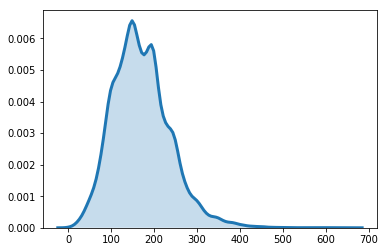

In [12]:
sns.distplot(nr_words, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  )

I will make secondary df that remove all strange abstract and very short abstracts, see some examples below. The reason is that a window size of 10 will be used, so the abstract shoule be longer than that. Also, less training will be done on thses abstract so they will actully be not very well train – end up with clusters with small abstracts rather then basing it on context.

In [46]:
KTH_frame.Abstracts[nr_words < 30][1729]

'Not '

In [47]:
KTH_frame.Abstracts[nr_words < 30][566]

'We present a general algebraic formalism for homology and cohomology theories for Grassmannians. The formalism is expressed in terms of the action of factorization algebras on exterior powers.'

In [48]:
KTH_frame.Abstracts[nr_words < 30].shape

(83,)

In [51]:
KTH_frame_small = KTH_frame[nr_words > 30]

In [52]:
KTH_frame_small.reset_index(inplace=True)

In [54]:
KTH_frame_small.to_csv("assets/dataframes/all_authors_df_2004_small")

Save dictonaries

In [116]:
class pickle_obj:
    def save_obj(self, obj, name ):
        with open(name + '.pkl', 'wb') as f:
            pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    def load_obj(self, name ):
        with open('.pkl', 'rb') as f:
            return pickle.load(f)

In [122]:
!ls "./assets/dictionaries"

In [193]:
auth_id = {v:k for k, v in zip(id_auth.keys(), id_auth.values())}

In [195]:
pickle_obj().save_obj(id_auth, "./assets/dictionaries/id_to_all_auths_2004" )
pickle_obj().save_obj(auth_id, "./assets/dictionaries/auths_to_all_id_2004" )

# Some further investigation of the data

In [4]:
KTH_frame_small = pd.read_csv("assets/dataframes/all_authors_df_2004_small")
KTH_author = pd.read_csv("assets/dataframes/KT_auth_2004")

Let's check the distribution of authors from different departments

In [5]:
def authors_dep_and_school(df):
    kth_dep = list()
    kth_school = list()
    no_dep=0
    for i in df.KTH_id.unique():
        if len(df[df.KTH_id == i].dep_name.values) > 0:
            kth_dep += df[df.KTH_id == i].dep_name.unique().tolist()
            kth_school += df[df.KTH_id == i].skola_namn.unique().tolist()
        else:
            no_dep +=1
    return kth_dep, kth_school

In [6]:
kth_dep = list()
kth_school = list()
no_dep=0
for i in KTH_author.KTH_id.unique():
    if len(KTH_author[KTH_author.KTH_id == i].dep_name.values) > 0:
        kth_dep += KTH_author[KTH_author.KTH_id == i].dep_name.unique().tolist()
        kth_school += KTH_author[KTH_author.KTH_id == i].skola_namn.unique().tolist()
    else:
        no_dep +=1

In [7]:
kth_dep_s = pd.Series(kth_dep).value_counts().sort_values(ascending=False)

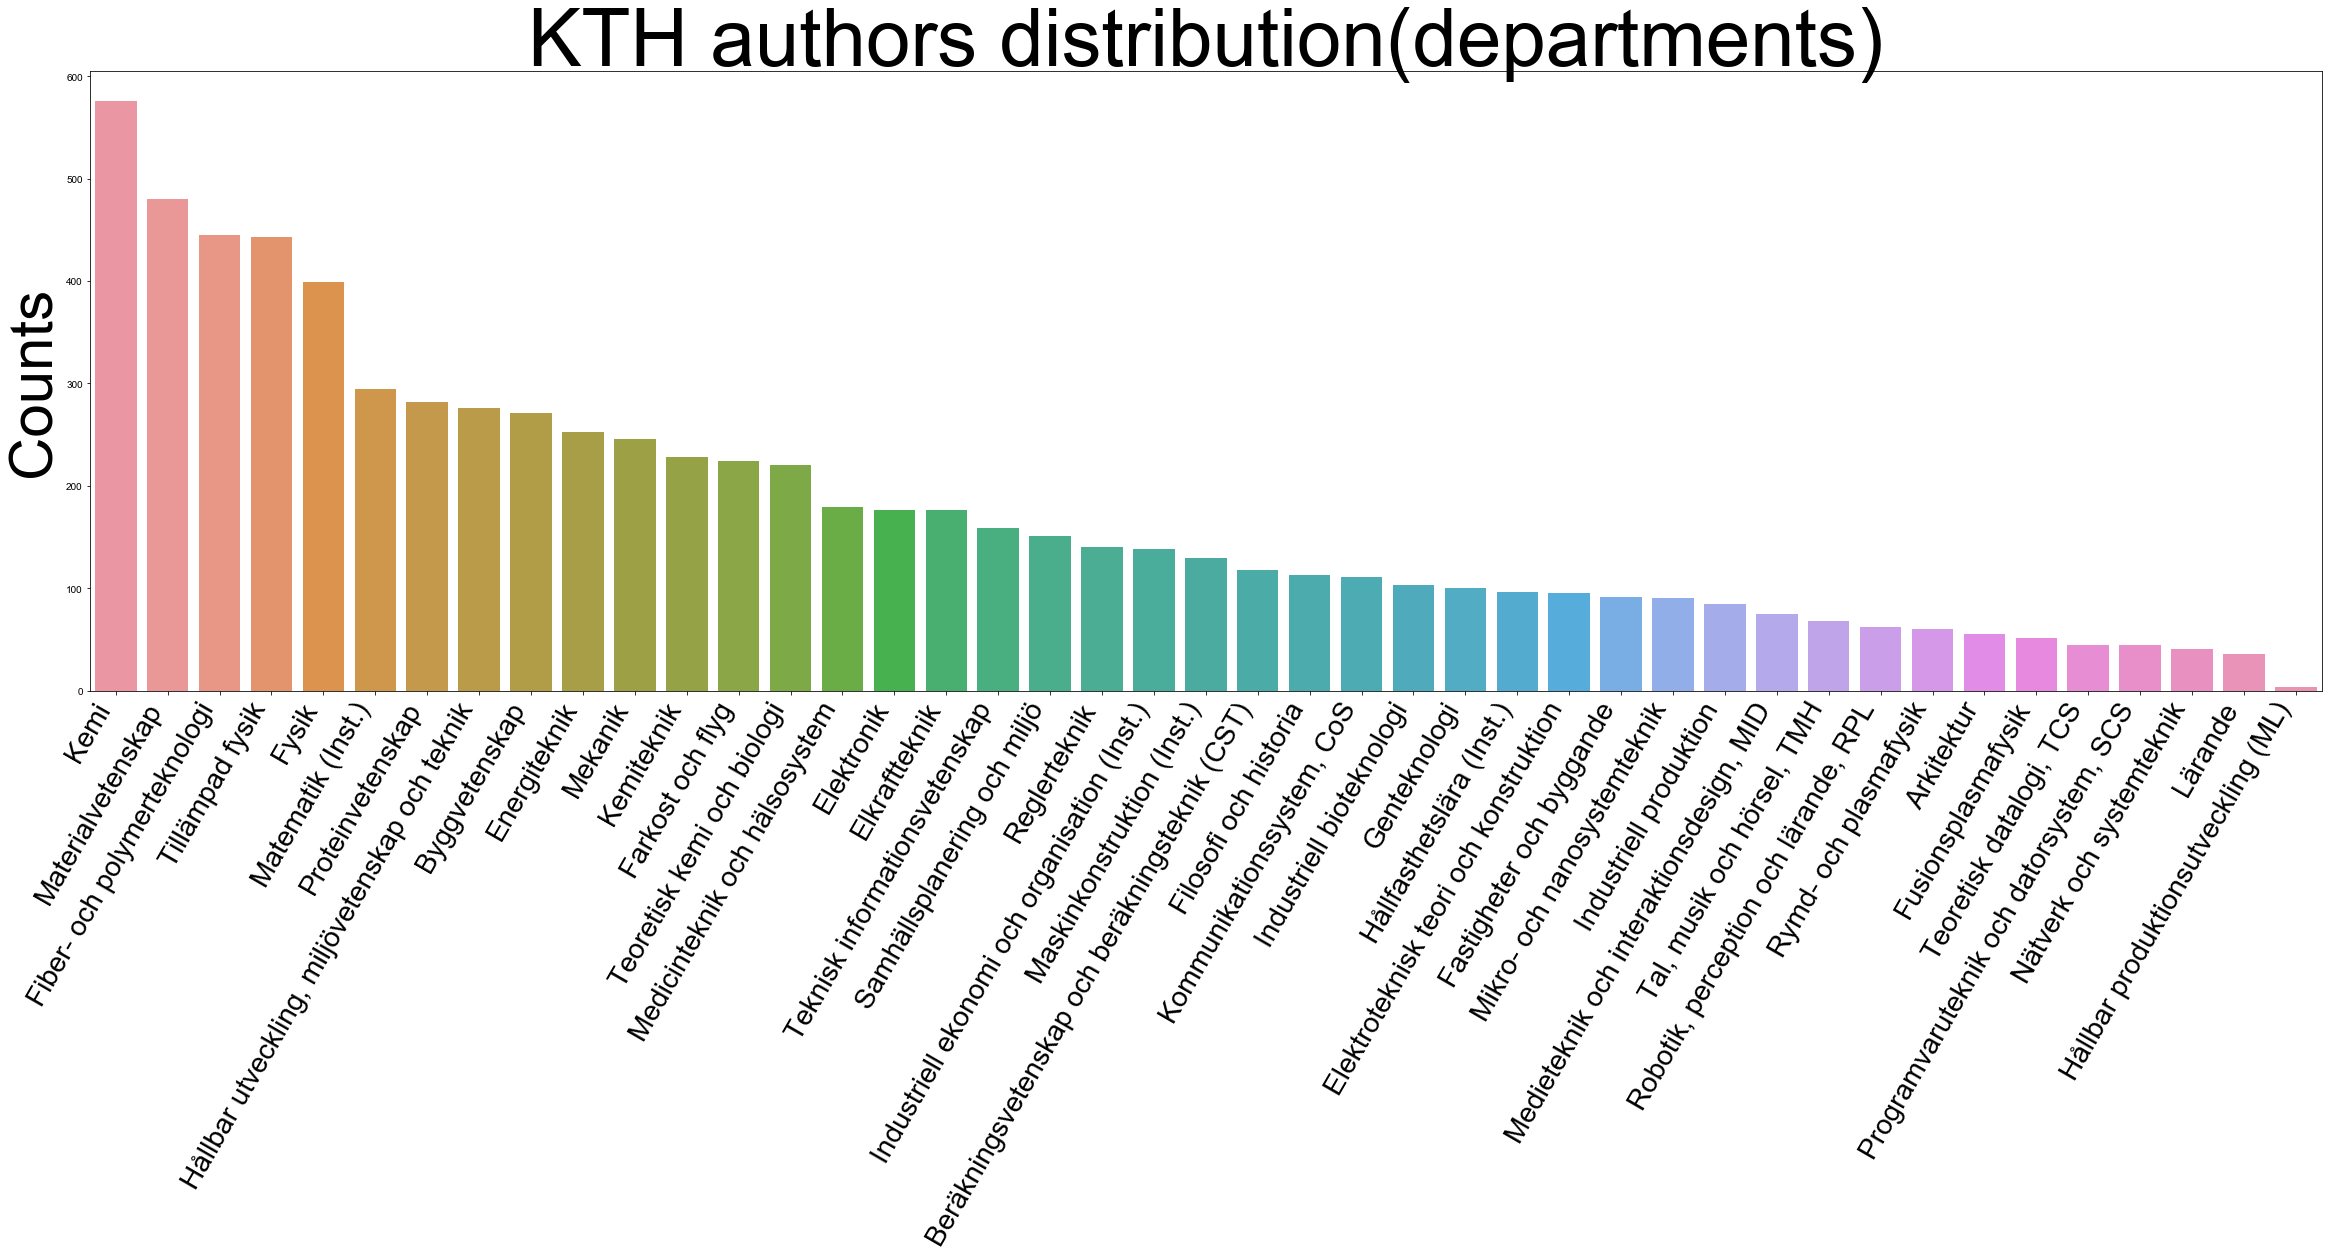

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(40,20))
ax = sns.barplot(kth_dep_s.index, kth_dep_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right",fontsize=28)
#ax.set_yticklabels(fontsize=23)



ax.set_ylabel("Counts",fontsize=60)

ax.set_title("KTH authors distribution(departments)",fontsize=80)




sns.set(font_scale=3)

#plt.show()
plt.gcf().subplots_adjust(bottom=0.45)

plt.show()

plt.savefig("assets/figures/authors_departments")


Let's check the distribution of authors from different schools

In [9]:
kth_school_s = pd.Series(kth_school).value_counts().sort_values(ascending=False)

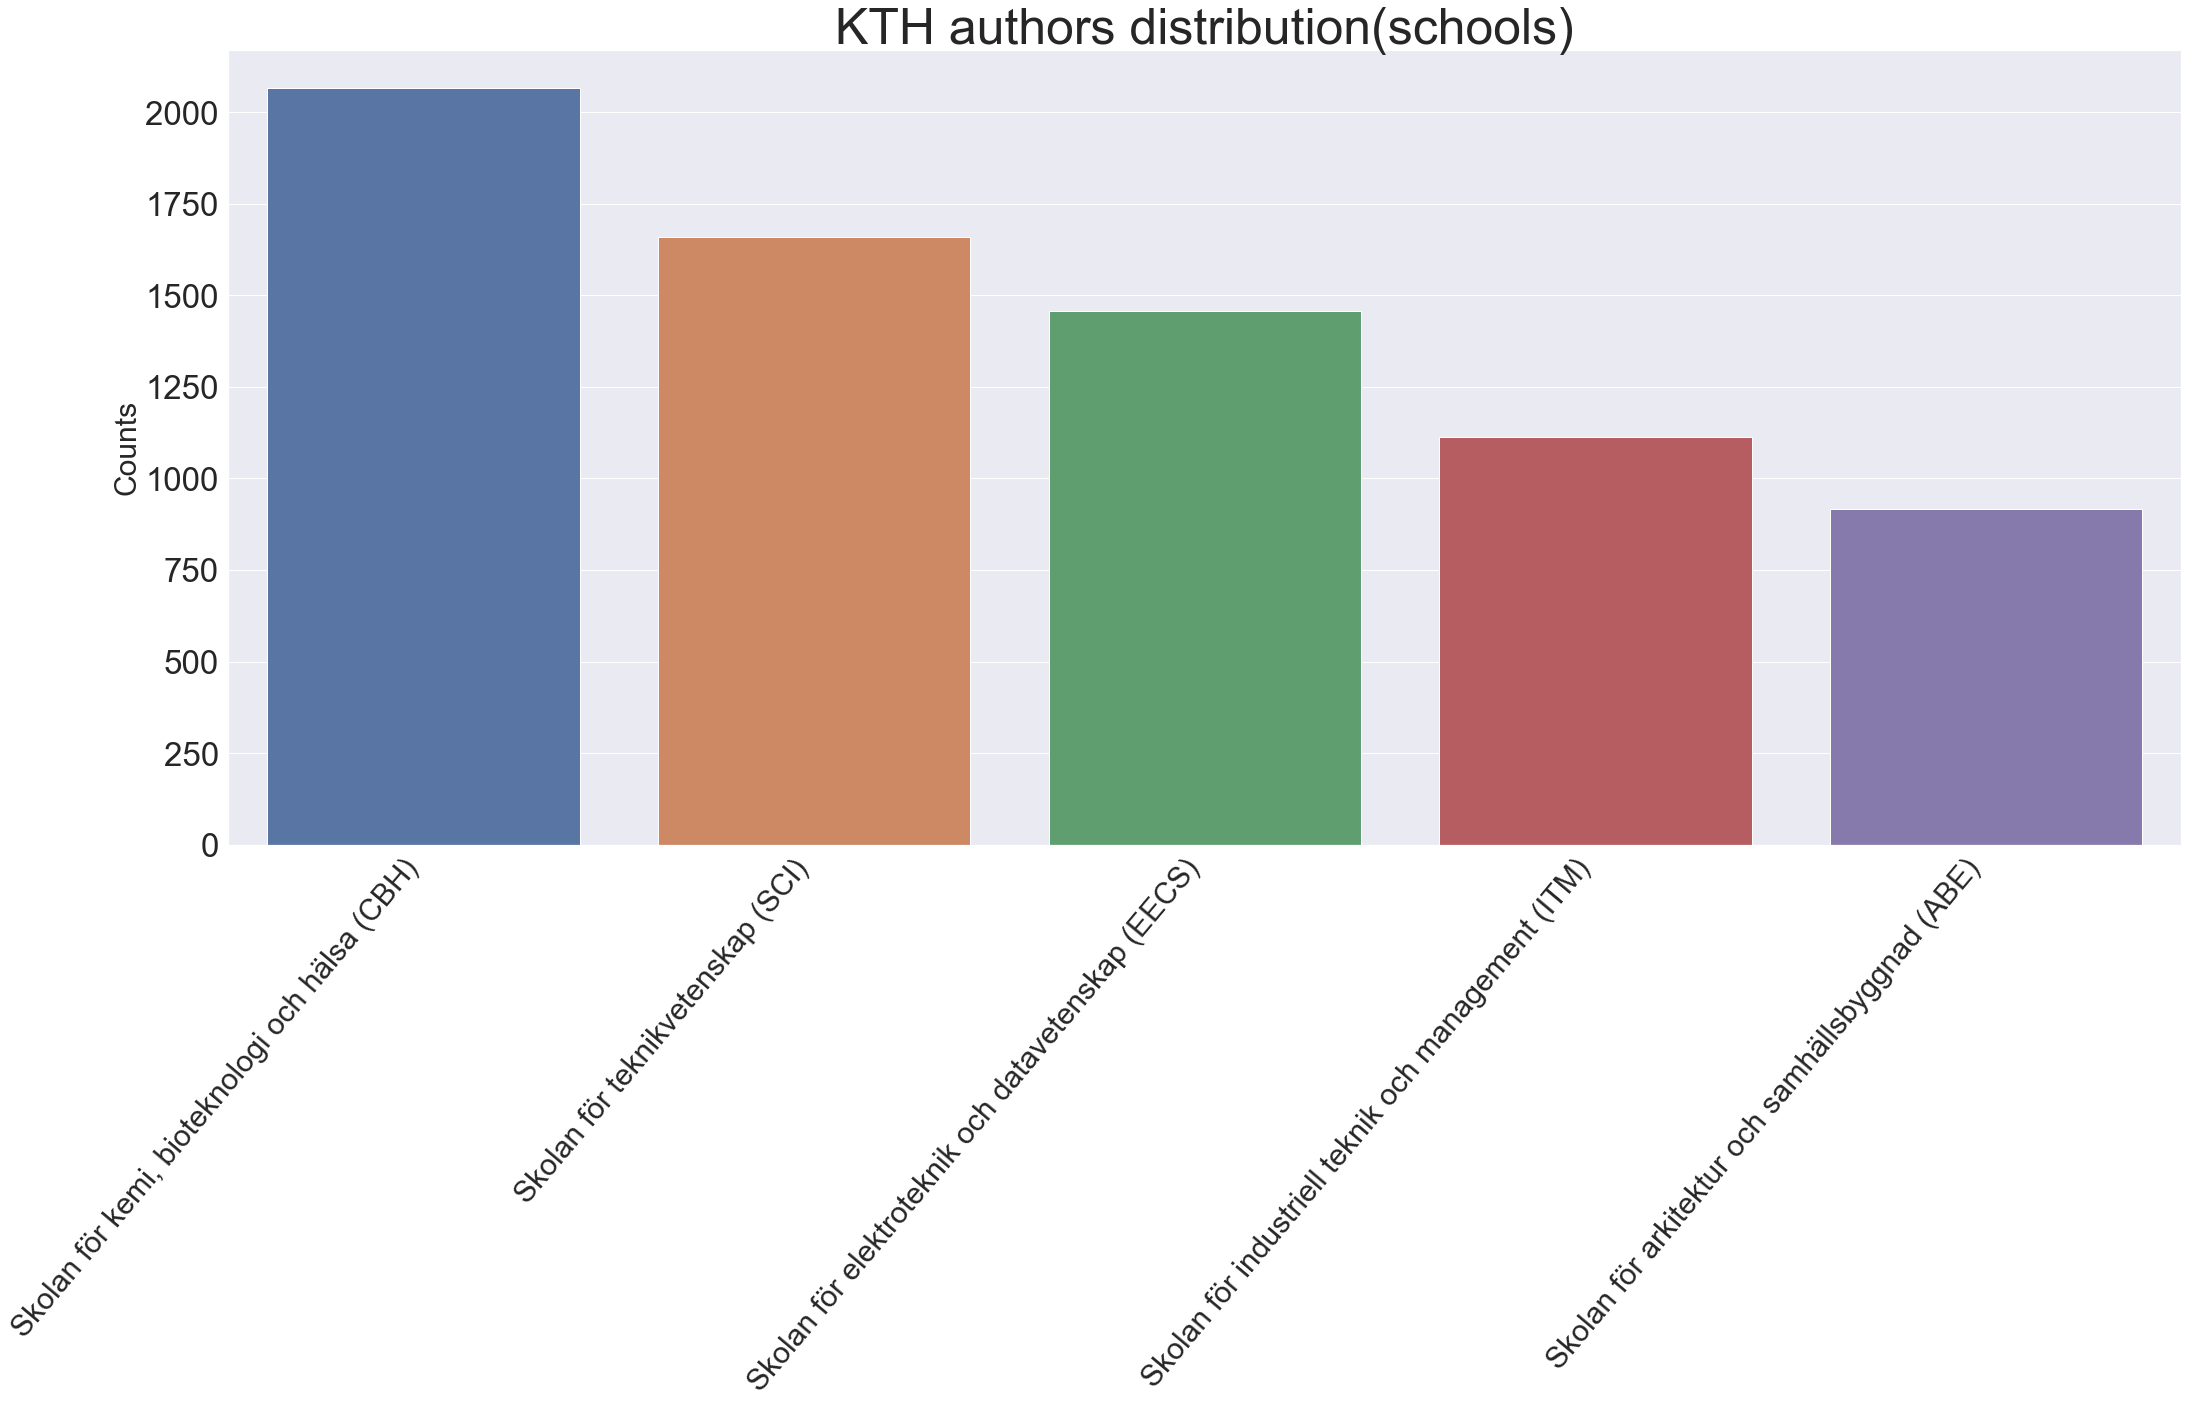

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()
plt.savefig("assets/figures/authors_departments")

Let's check the distribution of articles from different departments

In [11]:
kth_dep_doc = list()
kth_school_doc = list()
no_dep=0
for i in KTH_author.Doc_id.unique():
    if len(KTH_author[KTH_author.Doc_id == i].Doc_id.values) > 0:
        kth_dep_doc += KTH_author[KTH_author.Doc_id == i].dep_name.unique().tolist()
        kth_school_doc += KTH_author[KTH_author.Doc_id == i].skola_namn.unique().tolist()
    else:
        no_dep +=1

In [12]:
kth_dep_doc_s = pd.Series(kth_dep_doc).value_counts().sort_values(ascending=False)

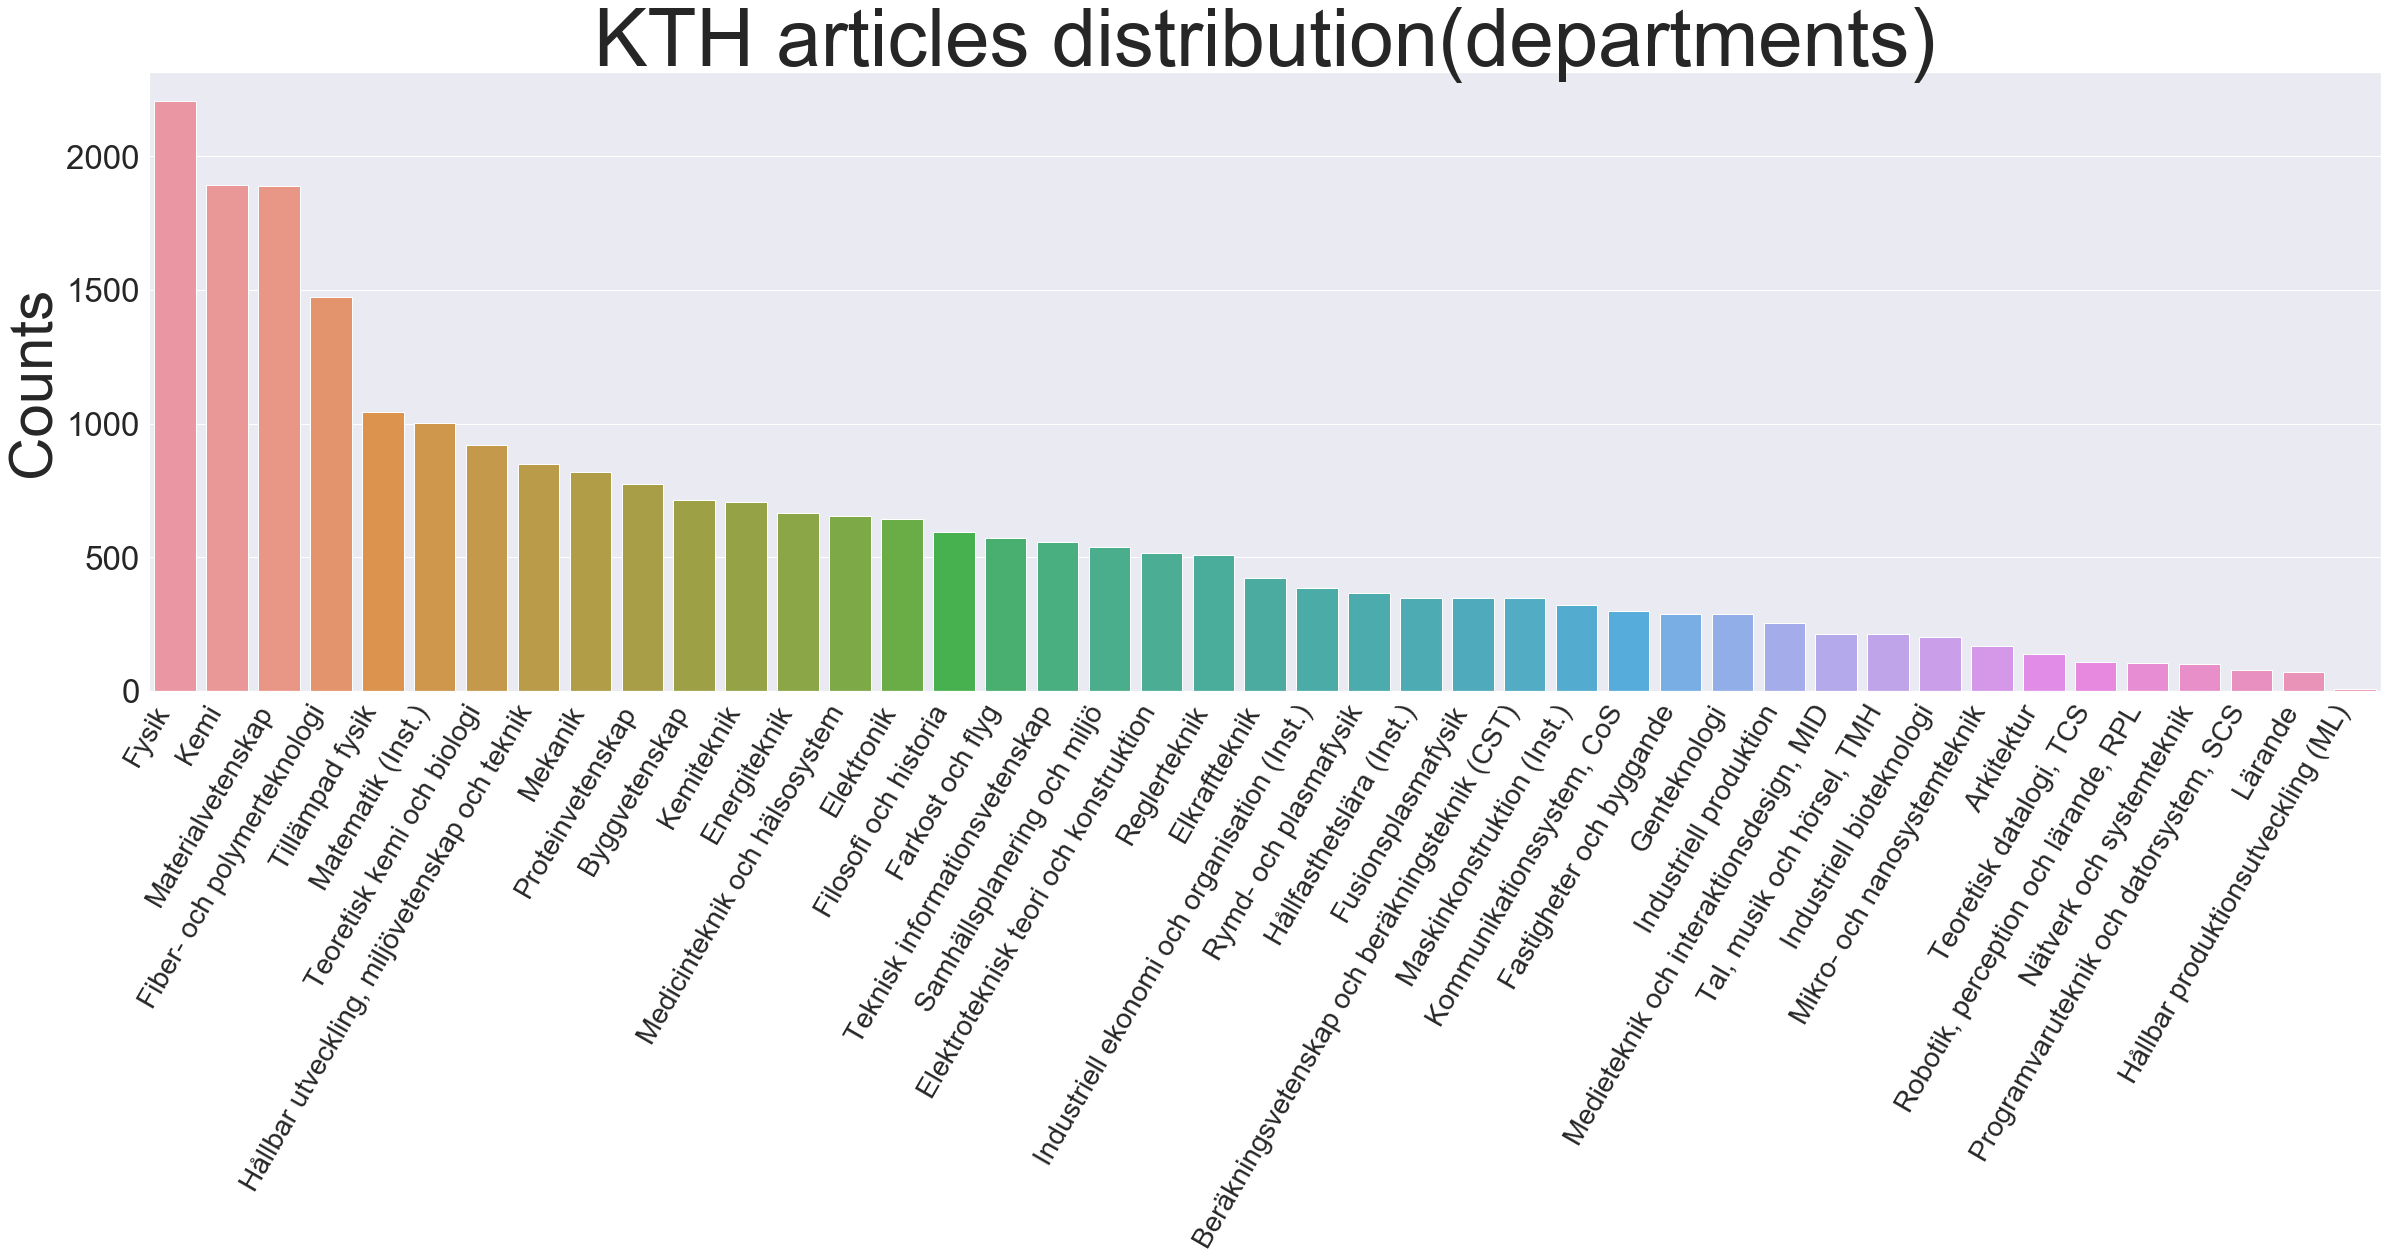

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(40,20))
#ax = sns.countplot(kth_dep_doc)
ax = sns.barplot(kth_dep_doc_s.index, kth_dep_doc_s.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right",fontsize=28)

ax.set_ylabel("Counts",fontsize=60)
ax.set_title("KTH articles distribution(departments)",fontsize=80)
sns.set(font_scale=3)
#plt.show()
plt.gcf().subplots_adjust(bottom=0.45)
plt.show()
plt.savefig("assets/figures/articles_departments")

Let's check the distribution of articles from different schools

In [14]:
kth_school_doc_s = pd.Series(kth_school_doc).value_counts().sort_values(ascending=False)

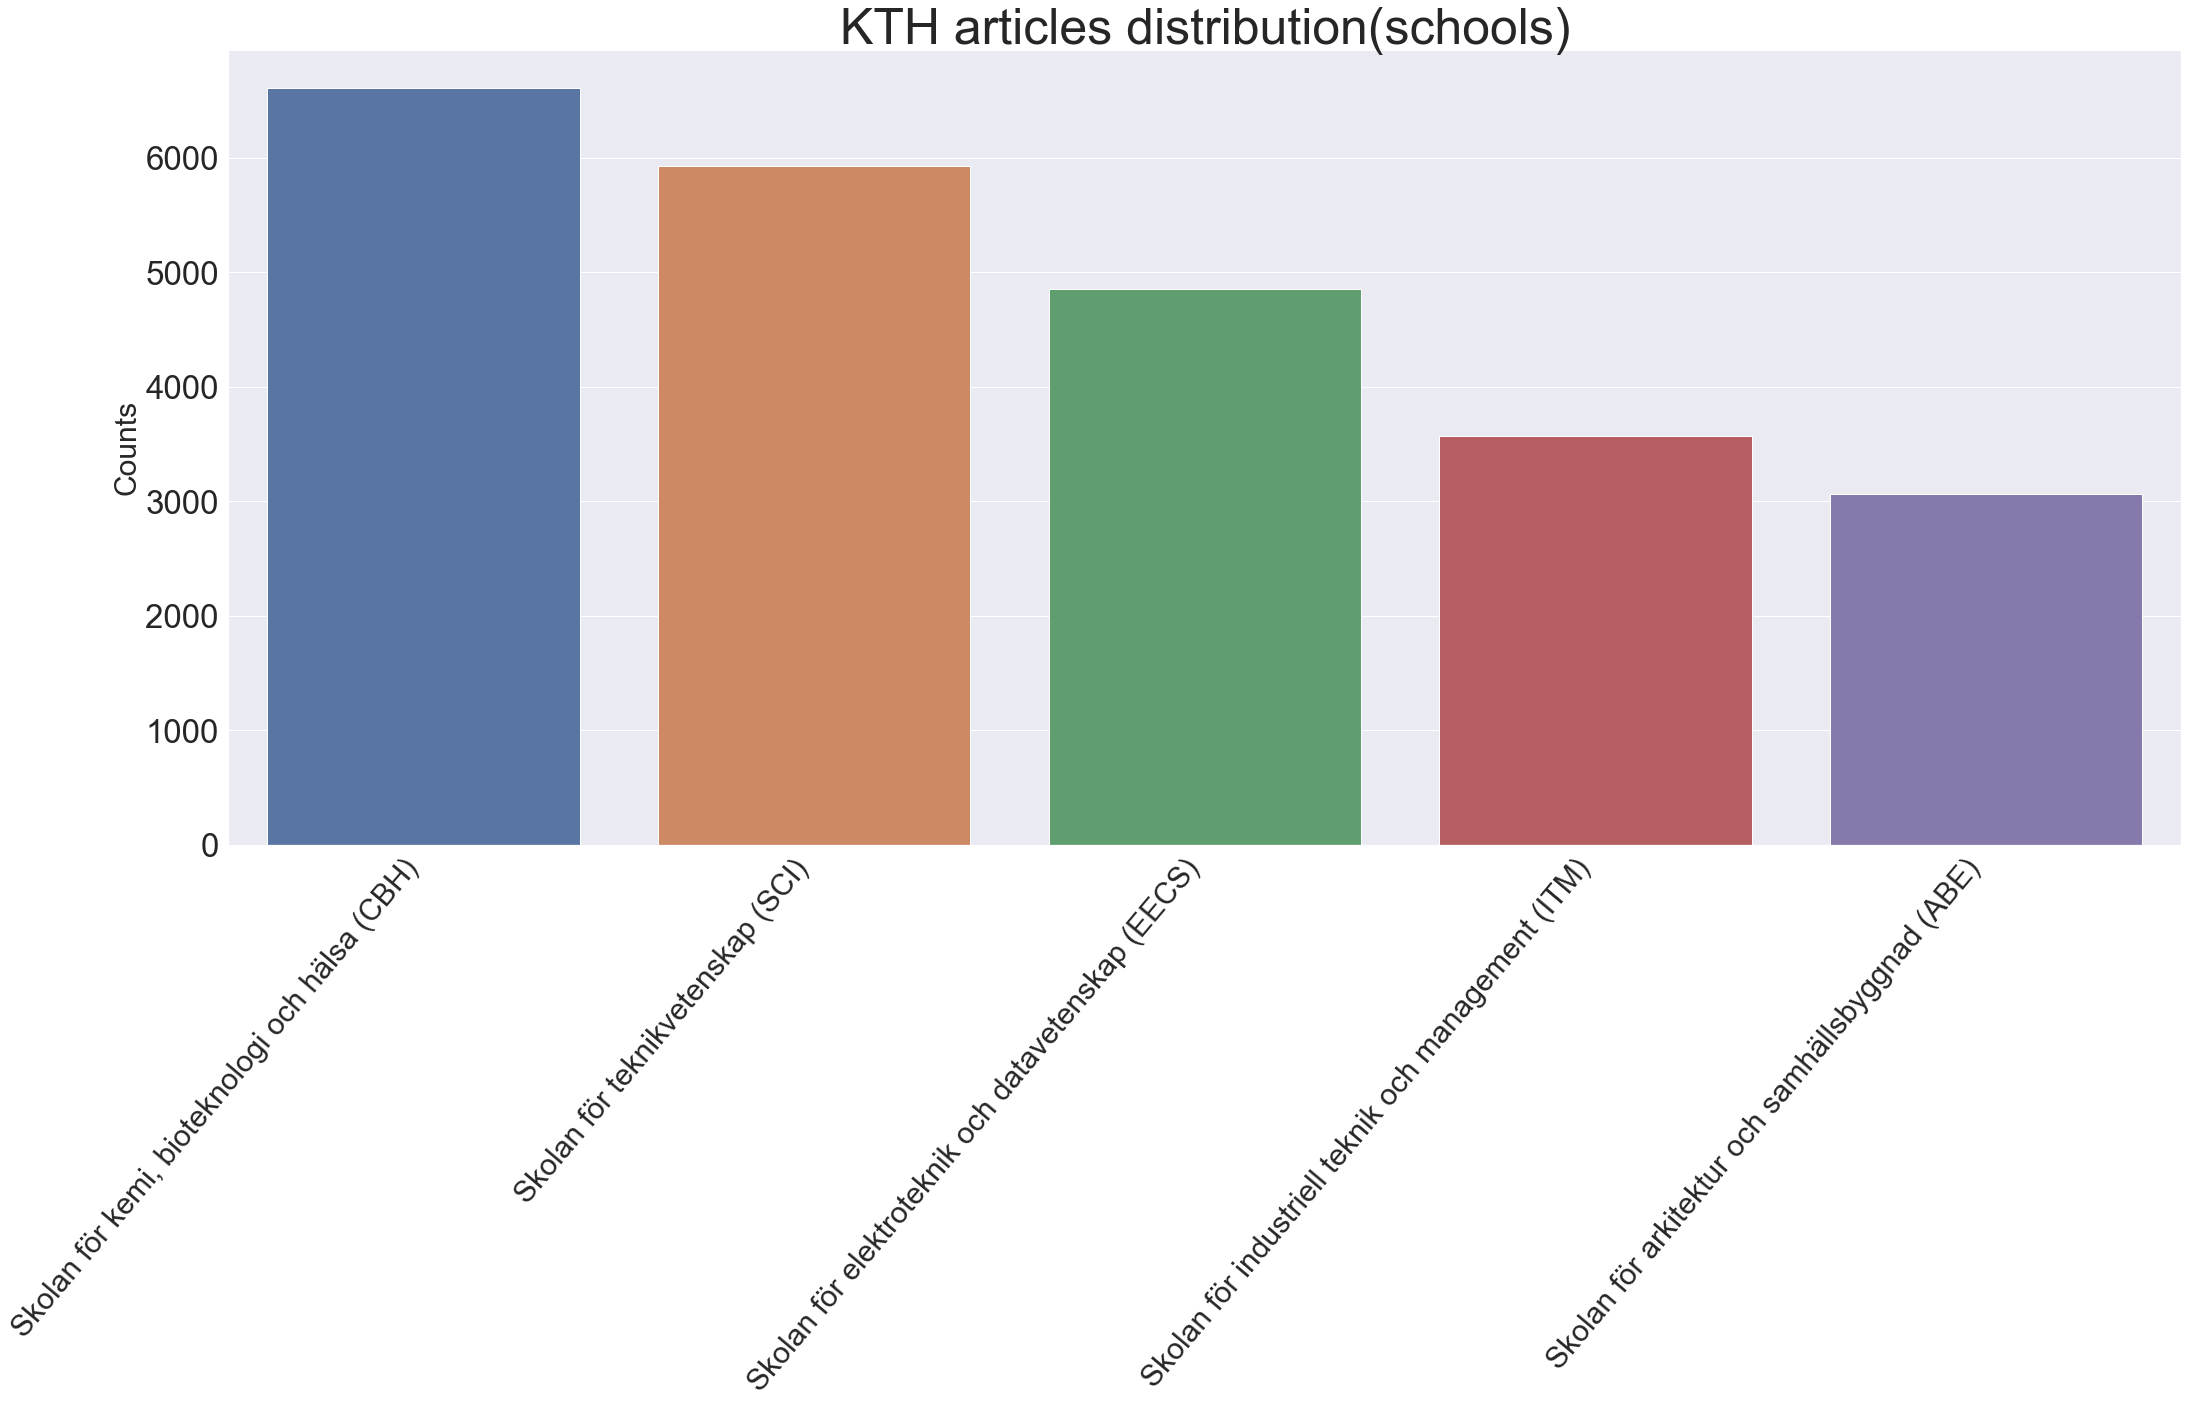

In [15]:
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_doc_s.index, kth_school_doc_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH articles distribution(schools)",fontsize=50)
ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)

plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig("assets/figures/articles_school")

In [16]:
kth_dep_s.index

Index(['Kemi', 'Materialvetenskap', 'Fiber- och polymerteknologi',
       'Tillämpad fysik', 'Fysik', 'Matematik (Inst.)', 'Proteinvetenskap',
       'Hållbar utveckling, miljövetenskap och teknik', 'Byggvetenskap',
       'Energiteknik', 'Mekanik', 'Kemiteknik', 'Farkost och flyg',
       'Teoretisk kemi och biologi', 'Medicinteknik och hälsosystem',
       'Elektronik', 'Elkraftteknik', 'Teknisk informationsvetenskap',
       'Samhällsplanering och miljö', 'Reglerteknik',
       'Industriell ekonomi och organisation (Inst.)',
       'Maskinkonstruktion (Inst.)',
       'Beräkningsvetenskap och beräkningsteknik (CST)',
       'Filosofi och historia', 'Kommunikationssystem, CoS',
       'Industriell bioteknologi', 'Genteknologi', 'Hållfasthetslära (Inst.)',
       'Elektroteknisk teori och konstruktion', 'Fastigheter och byggande',
       'Mikro- och nanosystemteknik', 'Industriell produktion',
       'Medieteknik och interaktionsdesign, MID', 'Tal, musik och hörsel, TMH',
       'Robo

In [17]:
kth_dep_s.values

array([576, 480, 445, 443, 399, 295, 282, 276, 271, 253, 246, 228, 224,
       220, 179, 176, 176, 159, 151, 140, 138, 130, 118, 113, 111, 103,
       100,  96,  95,  91,  90,  85,  75,  68,  62,  60,  55,  51,  45,
        45,  41,  36,   4])

In [18]:
A = kth_dep_s.index.values
B = np.array(["Proteinvetenskap", "Teoretisk kemi och biologi", 
              "Medicinteknik och hälsosystem", "Industriell bioteknologi",
             "Genteknologi"])
lf_ix = np.intersect1d(A, B, return_indices=True)[1];lf_ix

array([26, 25, 14,  6, 13])

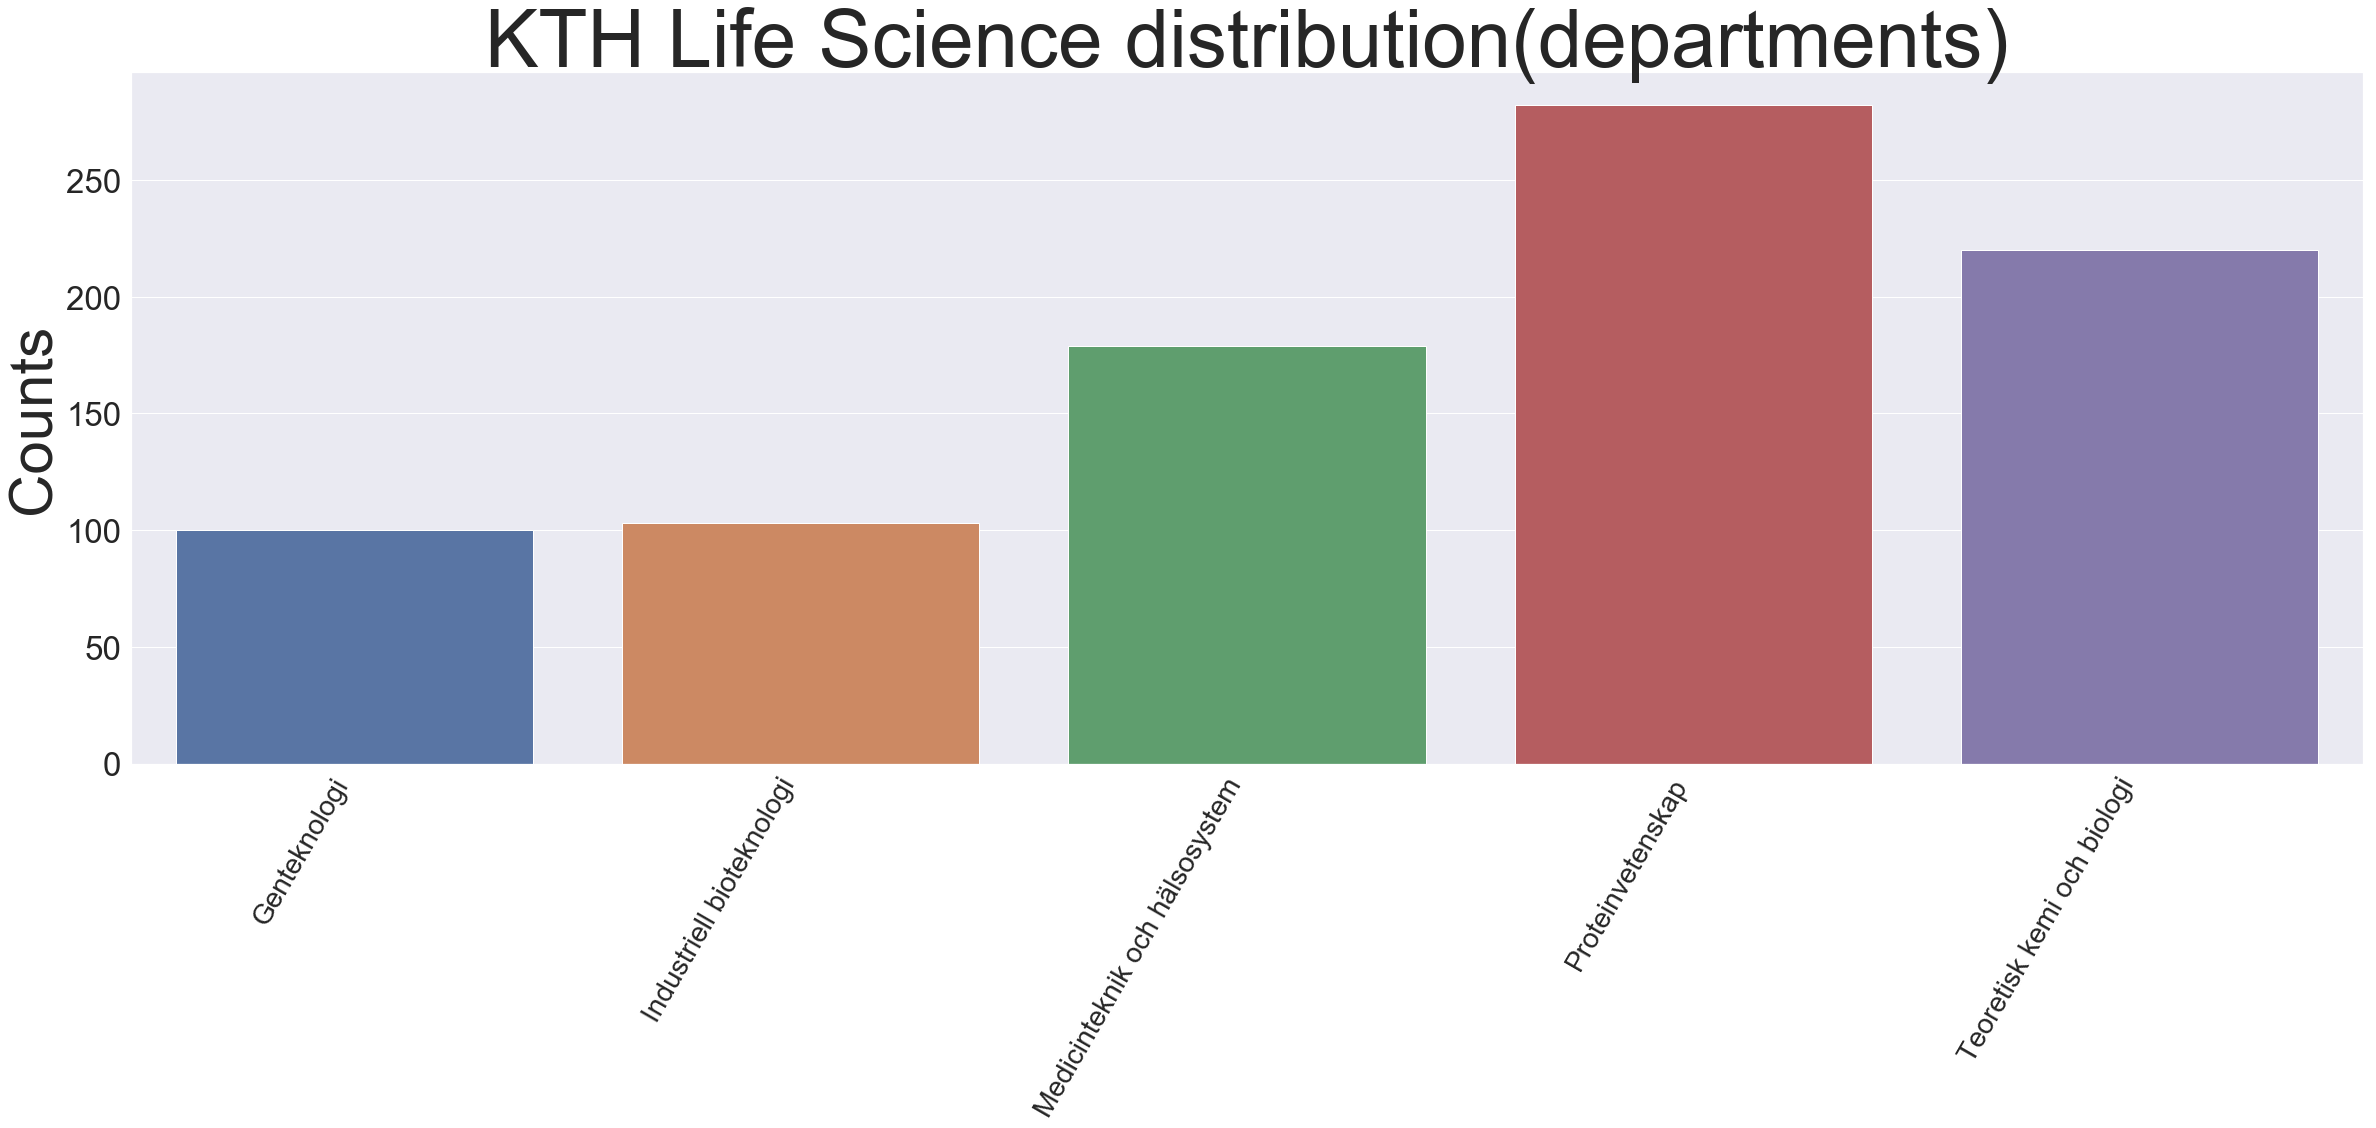

In [19]:
plt.figure(figsize=(40,20))
ax = sns.barplot(kth_dep_s.index[lf_ix], kth_dep_s.values[lf_ix])

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right",fontsize=28)


ax.set_ylabel("Counts",fontsize=60)

ax.set_title("KTH Life Science distribution(departments)",fontsize=80)

sns.set(font_scale=3)


plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig("assets/figures/articles_school")

In [24]:
len(set(kth_dep_s.index[lf_ix]))

5

In [23]:
kth_dep_s.values[lf_ix].sum()

884